In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
planilha = pd.read_csv('demissoes.csv', sep=',')

In [38]:
planilha

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
...,...,...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public,NaN
485,Oracle,Unclear,Unclear,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN


# 1 Tratamento dos dados

In [8]:
planilha.isnull().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
dtype: int64

In [9]:
'''
Dados nulos na coluna additional_notes
'''
planilha['additional_notes']

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4      Per Axios, 22 of the employees laid off were f...
                             ...                        
484                                                  NaN
485    The Information reported thousands of people w...
486                                                  NaN
487                                                  NaN
488                                                  NaN
Name: additional_notes, Length: 489, dtype: object

In [10]:
"""
Identificando a quantidade de dados obscuros 'Unclear' nas colunas.
"""
planilha[planilha.impacted_workforce_percentage=='Unclear'].count()

company                          133
total_layoffs                    133
impacted_workforce_percentage    133
reported_date                    133
industry                         133
headquarter_location             133
sources                          133
status                           133
additional_notes                  14
dtype: int64

# 2  Identificação e tratamento de valores atípicos (outliers);

<AxesSubplot: >

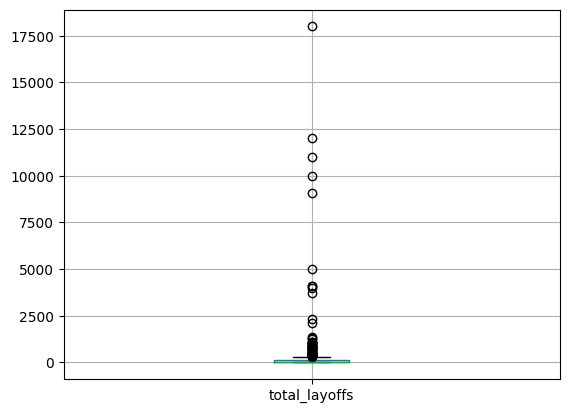

In [50]:
planilha.boxplot(column=['total_layoffs'])

# 3 Tratamento em formato de dados

 Para substituir os dados nulos e os dados obscuros das colunas,
 foi utilizado a função str.replace para substituir por 0 e por 'Sem comentários'

In [19]:

planilha['company'] = planilha['company'].str.replace('Unclear','Empresa_vazio',regex=False)

In [20]:
planilha[planilha.company=='Empresa_vazio'].count()

company                          0
total_layoffs                    0
impacted_workforce_percentage    0
reported_date                    0
industry                         0
headquarter_location             0
sources                          0
status                           0
additional_notes                 0
dtype: int64

In [41]:
planilha['total_layoffs'] = planilha['total_layoffs'].str.replace('Unclear','0',regex=False)

In [42]:
planilha['impacted_workforce_percentage'] = planilha['impacted_workforce_percentage'].str.replace('Unclear','0',regex=False)

In [43]:
planilha.loc[planilha.additional_notes.isnull(),'additional_notes'] = 'Sem comentários'

In [44]:
"""
Verificando os dados atualizados
"""
planilha['total_layoffs'] = planilha['total_layoffs'].astype('int')

In [45]:
planilha

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,Sem comentários
1,VideoAmp,0,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,Sem comentários
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,Sem comentários
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,Sem comentários
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
...,...,...,...,...,...,...,...,...,...
484,Salesforce,9090,0,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public,Sem comentários
485,Oracle,0,0,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,0,0,9/15/2022,Customer service,New York,LinkedIn,Public,Sem comentários
487,Skillz,0,0,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,Sem comentários


# 4 Se vários datasets, identificar chaves primárias e realizar a junção (join)

Foi utilizado apenas um dataframe, não foi necessario realizar a junção.

# 5 Criação de novos dados para facilitar a análise (feature engineering)

Por o dataframe ser pequeno não foi precisso criar novos dados para substituir os já existentes.

# 6  Realizar 5 análises descritivas e gerar os respectivos gráficos

 1 -  Qual Companhia teve mais demissões? 

In [26]:
"""
Soma e ordenação das empresas que mais demitiram, usando as funções .sum e .sort_values
"""
planilha.groupby('company').sum(numeric_only=True).total_layoffs.sort_values(ascending=False).head(5)

company
Amazon        18000
Alphabet      12000
Meta          11000
Microsoft     10000
Salesforce     9090
Name: total_layoffs, dtype: int32

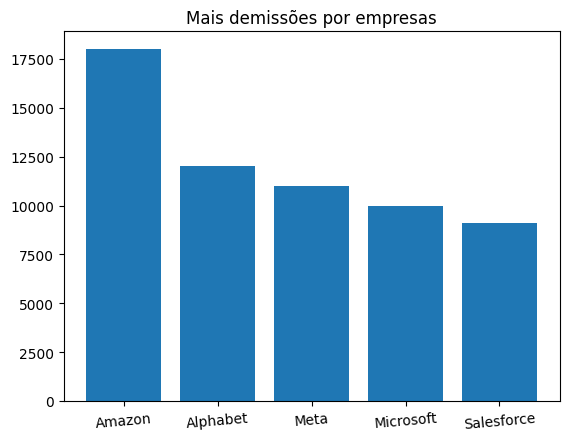

In [27]:
demitidos = planilha.groupby('company').sum(numeric_only=True).total_layoffs.sort_values(ascending=False).head(5)

plt.bar(demitidos.index, demitidos.values)
plt.title('Mais demissões por empresas')
plt.xticks(rotation=5)
plt.show()

2 - Quais tipos de empresas (status) teve mais demissões? Pública ou Privada?

In [61]:
"""
Verificando qual tipo de empresa teve mais demissões com a função .count
"""

planilha.groupby('status').count().company.sort_values(ascending=False)

status
Private    370
Public     119
Name: company, dtype: int64

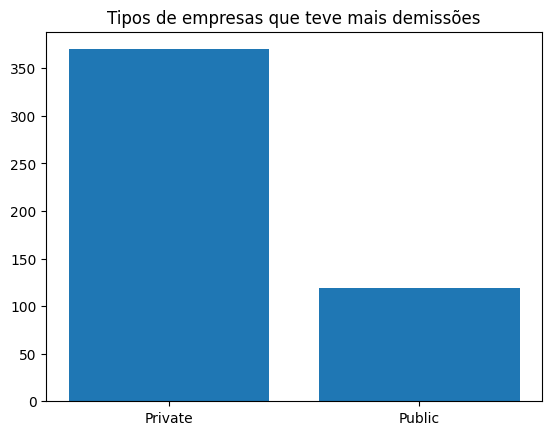

In [58]:
tipo = planilha.groupby('status').sum().company.sort_values(ascending=False)

plt.bar(tipo.index, tipo.values)
plt.title('Tipos de empresas que teve mais demissões')
plt.show()

3 - Qual ramo de industria teve mais demissões?

In [59]:
planilha.groupby('industry').count().company.sort_values(ascending=False)

industry
Fintech               24
Health Care           17
PropTech              15
E-commerce            13
Cybersecurity         10
                      ..
IT, future of work     1
IT, software           1
Insurance, fintech     1
Insurtech              1
video games            1
Name: company, Length: 289, dtype: int64

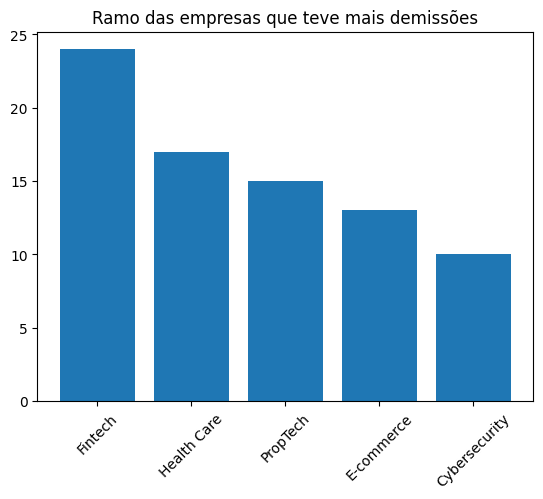

In [63]:
ramo = planilha.groupby('industry').count().company.sort_values(ascending=False).head(5)

plt.bar(ramo.index, ramo.values)
plt.title('Ramo das empresas que teve mais demissões')
plt.xticks(rotation=45)
plt.show()

4 - Qual foi a localidade com mais demitidos?

In [83]:
planilha.groupby('headquarter_location').count().company.sort_values(ascending=False)

headquarter_location
San Francisco          136
New York                77
Seattle                 21
Los Angeles             20
Boston                  16
                      ... 
Houston                  1
Hoboken, New Jersey      1
Healdsburg, CA           1
Hayward, California      1
Wilmington, NC           1
Name: company, Length: 134, dtype: int64

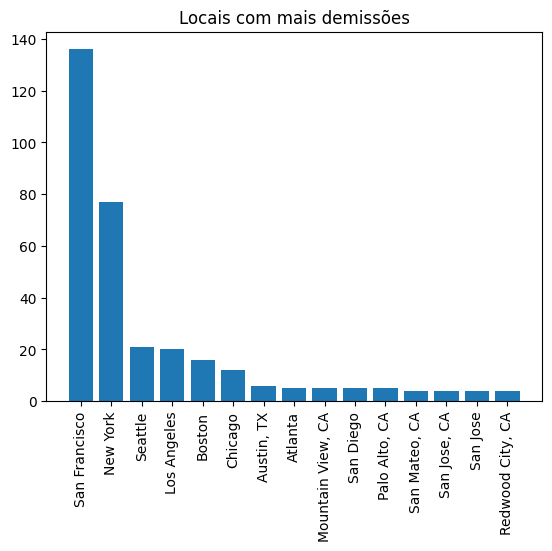

In [86]:
localidade = planilha.groupby('headquarter_location').count().company.sort_values(ascending=False).head(15)

plt.bar(localidade.index, localidade.values)
plt.title('Locais com mais demissões')
plt.xticks(rotation=90)
plt.show()

5 - Quais as principais fontes de informações?

In [88]:
planilha.groupby('sources').count().company.sort_values(ascending=False)

sources
TechCrunch              52
Business Insider        23
The Information         23
Calcalistech            20
LinkedIn                16
                        ..
External Spreadsheet     1
Fast Company             1
Freight Waves            1
FreightWaves             1
impact.com               1
Name: company, Length: 221, dtype: int64

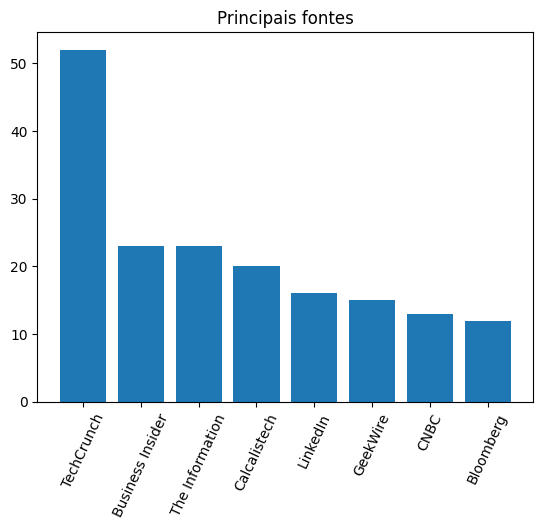

In [89]:
fonte = planilha.groupby('sources').count().company.sort_values(ascending=False).head(8)

plt.bar(fonte.index, fonte.values)
plt.title('Principais fontes')
plt.xticks(rotation=65)
plt.show()

Documento compartilhado via Google Drive e o link de acesso estar abaixo.

https://docs.google.com/document/d/1kjgDhSfB-3QWuOZN0YjJutob8NWYIa-s/edit